# Scrab Data Tabel

Goals : Project ini bertujuan untuk scrab data dari website kemenperin yang berbentuk tabel seperti berikut ini

Tahapan 
1. Deteksi feature yang akan diambil yaitu nama perusahaan, alamat, no hp dan komoditi.
2. Dapatkan content html dari suatu halaman tertentu (misal halaman 94)
3. Lakukan inspect elemen tabel tersebut dan temukan pola pengambilannya
4. Cari elemen yang bertipe "table"
5. Cari elemen yang mempunya tag "tr"
5. Lakukan perulang untuk setiap baris
6. Lakukan split untuk mendapatkan setiap feature tersebut
7. Lakukan try except untuk mengatasi feature yang tidak ada
8. Lakukan perulangan untuk setiap halaman (banyak halaman = 678)
9. Jadikan dalam bentuk dataframe

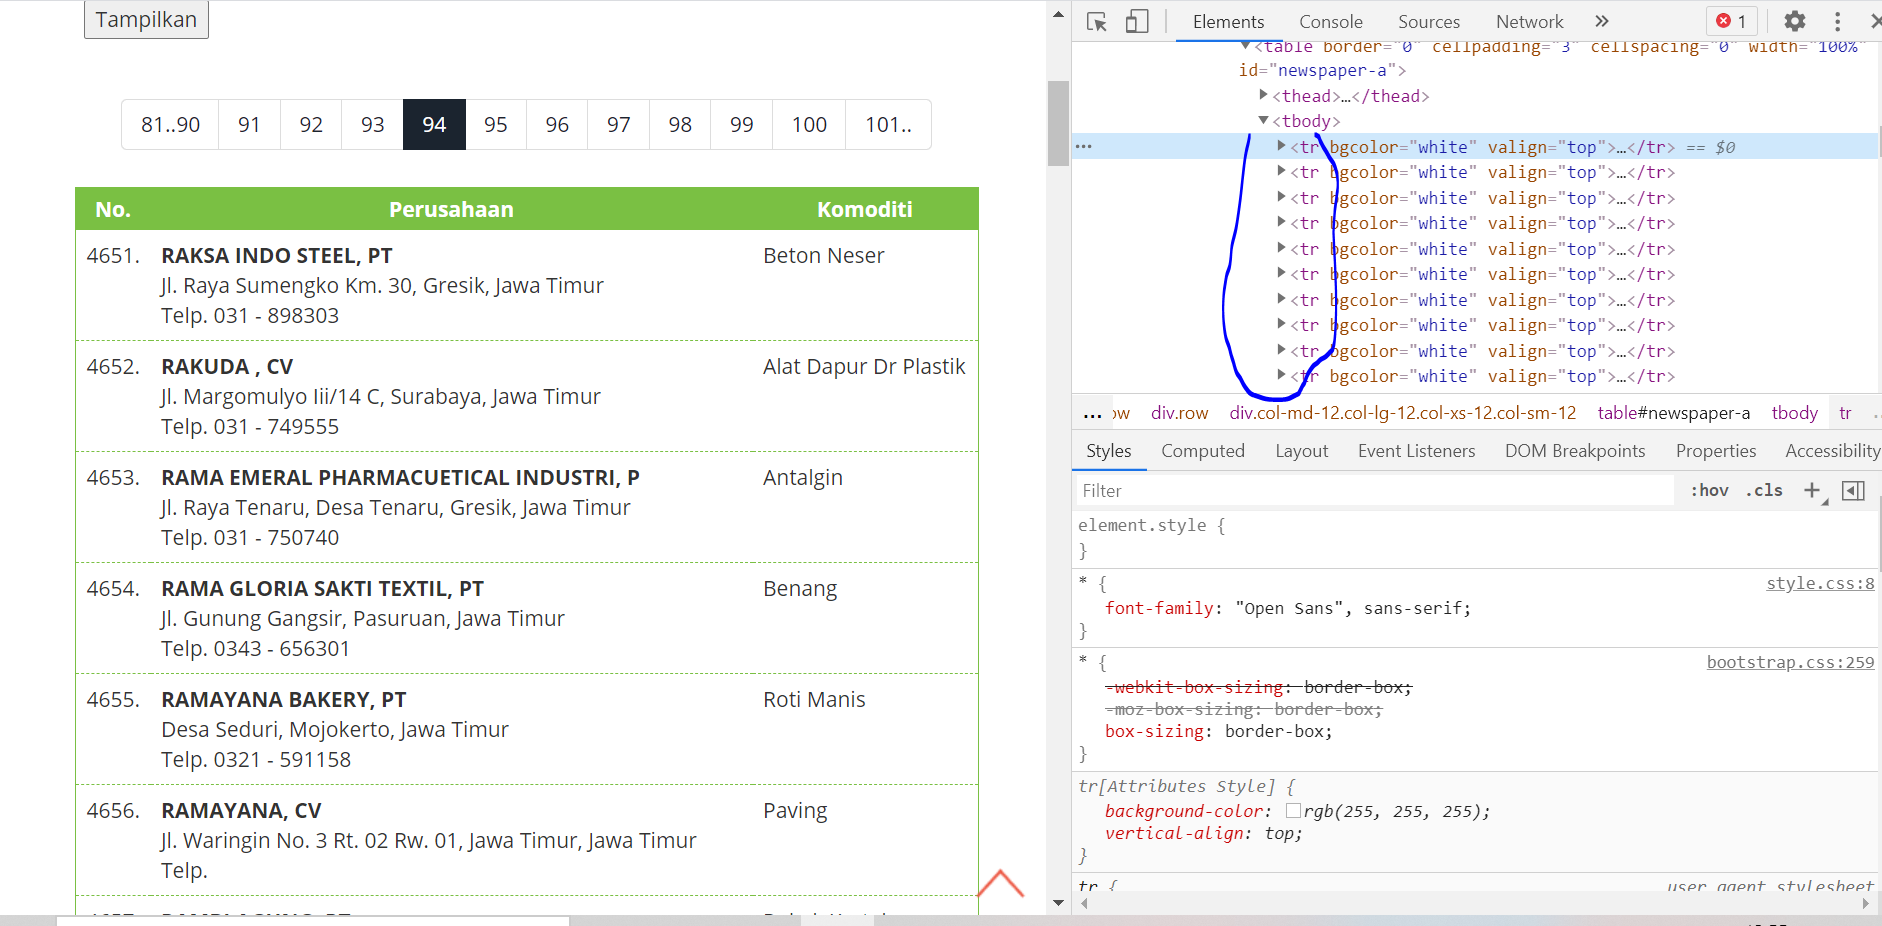

In [2]:
from IPython import display 
display.Image("images/source.png")

# 1. Pattern Identification

In [3]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [4]:
halaman = 1
URL = "https://kemenperin.go.id/direktori-perusahaan?what=&prov=&hal="+str(halaman)+""

In [5]:
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
tables = soup.find_all("table")
table = tables[0]

In [6]:
"""
Cari yang mempunya tag tr untuk mendapatkan data tiap row
"""
table.find_all("tr")[1]

<tr bgcolor="white" valign="top"><td align="right">1.</td><td><b> KOTA UDANG</b><br/>Jl. Kalijaga No. 36, Cirebon, Jawa Barat<br/>Telp. 0231 - 209057</td><td>Sohun</td></tr>

In [7]:
"""
Gunakan split untuk mendapatkan elemen tiap kolom
"""
str(table.find_all("tr")[1]).split("</td><td><b>")[1]

' KOTA UDANG</b><br/>Jl. Kalijaga No. 36, Cirebon, Jawa Barat<br/>Telp. 0231 - 209057</td><td>Sohun</td></tr>'

In [8]:
"""
Mendapatkan nama perusahaan
"""
str(table.find_all("tr")[1]).split("</td><td><b>")[1].split("</b><br/>")[0]

' KOTA UDANG'

In [9]:
"""
Mendapatkan alamat
"""
str(table.find_all("tr")[1]).split("</td><td><b>")[1].split("</b><br/>")[1].split("<br/>")[0]

'Jl. Kalijaga No. 36, Cirebon, Jawa Barat'

In [10]:
"""
Mendapatkan No Telepon
"""
str(table.find_all("tr")[1]).split("</td><td><b>")[1].split("</b><br/>")[1].split("<br/>")[1].split("</td><td>")[0]

'Telp. 0231 - 209057'

In [11]:
"""
Mendapatkan Komoditi
"""
str(table.find_all("tr")[1]).split("</td><td><b>")[1].split("</b><br/>")[1].split("<br/>")[1].split("</td><td>")[1].split("</td></tr>")[0]

'Sohun'

# 2. Bring Together

In [12]:
def getData(halaman):
    # url_last = "https://kemenperin.go.id/direktori-perusahaan?what=&prov=&hal=678" 
    
    url = "https://kemenperin.go.id/direktori-perusahaan?what=&prov=&hal="+str(halaman)+""
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    tables = soup.find_all("table")
    table = tables[0]
    
    extract = []
    for k in range(1,len(table.find_all("tr"))): # perulangan untuk setiap row
        text = str(table.find_all("tr")[k]) # mendapatkan elemen setiap row
        try:
            name = text.split("</td><td><b>")[1].split("</b><br/>")[0] # split untuk mendapatkan elemen
            address = text.split("</td><td><b>")[1].split("</b><br/>")[1].split("<br/>")[0]
            NoHp = text.split("</td><td><b>")[1].split("</b><br/>")[1].split("<br/>")[1].split("</td><td>")[0]
            Komoditi = text.split("</td><td><b>")[1].split("</b><br/>")[1].split("<br/>")[1].split("</td><td>")[1].split("</td></tr>")[0]
        except:
            name = ''
            address = ''
            NoHp = ''
            Komoditi = ''
        
        res = [name,address,NoHp,Komoditi]
        extract.append(res)
    
    df = pd.DataFrame(extract)
    df.columns = ['name','Address','Telp','Komoditi']
    
    return df


In [13]:
alldata = []
halaman_terakhir = 678
for k in range(1,halaman_terakhir+1):
    alldata.append(getData(k))

ConnectionError: HTTPSConnectionPool(host='kemenperin.go.id', port=443): Max retries exceeded with url: /direktori-perusahaan?what=&prov=&hal=629 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000211CC120A90>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [ ]:
dfAlldata = pd.concat(alldata)

In [ ]:
dfAlldata.head(100)

In [ ]:
dfAlldata.to_excel('Data.xlsx')

# Refference
1. https://towardsdatascience.com/scrape-tabular-data-with-python-b1dd1aeadfad
2. https://kemenperin.go.id/direktori-perusahaan?what=&prov=35&hal=94